# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1, has diabetes or no)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: 
- `Glucose`: 
- `BloodPressure`: 
- `SkinThickness`: 
- `Insulin`: 
- `BMI`: 
- `DiabetesPedigreeFunction`: 
- `Age`: 
- `Outcome`: 

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load in data
diabetes_data = pd.read_csv('diabetes.csv')

3. How many columns (features) does the data contain?

In [2]:
# print number of columns
# pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4. How many rows (observations) does the data contain?

In [3]:
# print number of rows
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [4]:
# find whether columns contain null values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [5]:
# perform summary statistics
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000
max      17.0000

7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**: Yes, a min = 0

8. Do you spot any other outliers in the data?

**Your response to question 8**:

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [6]:
# replace instances of 0 with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [7]:
# find whether columns contain null values after replacements are made
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [8]:
# print rows with missing values
print(diabetes_data[diabetes_data.isnull().any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age Outcome
0              6    148.0           72.0           35.0      NaN  33.6                     0.627   50       1
1              1     85.0           66.0           29.0      NaN  26.6                     0.351   31       0
2              8    183.0           64.0            NaN      NaN  23.3                     0.672   32       1
5              5    116.0           74.0            NaN      NaN  25.6                     0.201   30       0
7             10    115.0            NaN            NaN      NaN  35.3                     0.134   29       0
..           ...      ...            ...            ...      ...   ...                       ...  ...     ...
761            9    170.0           74.0           31.0      NaN  44.0                     0.403   43       1
762            9     89.0           62.0            NaN      NaN  22.5                     0.142   33       0
764       

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**: SkinThickness and Insulin

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [9]:
# print data types using .info() method
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB
None


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [10]:
# print unique values of Outcome column
print(diabetes_data['Outcome'].unique())

['1' '0' 'O']


15. How might you resolve this issue?

**Your response to question 15**: Change O to 0

In [11]:
# replace evey O by 0 on the outcome column
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace("O", '0')
print(diabetes_data['Outcome'].unique())

['1' '0']


## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [12]:
diabetes_data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            74.0     52.0           10.0           36.0     27.8  0.269                     22   0          1
4            117.0    64.0           27.0           120.0    33.2  0.230                     24   0          1
             111.0    72.0           47.0           207.0    37.1  1.390                     56   1          1
             110.0    76.0           20.0           100.0    28.4  0.118                     27   0          1
             109.0    64.0           44.0           99.0     34.8  0.905                     26   1          1
                                                                                                            ..
1            131.0    64.0           14.0           415.0    23.7  0.389                     21   0          1
             130.0    70.0           13.0           105.0    25.9  0.472                     22   0          1
      

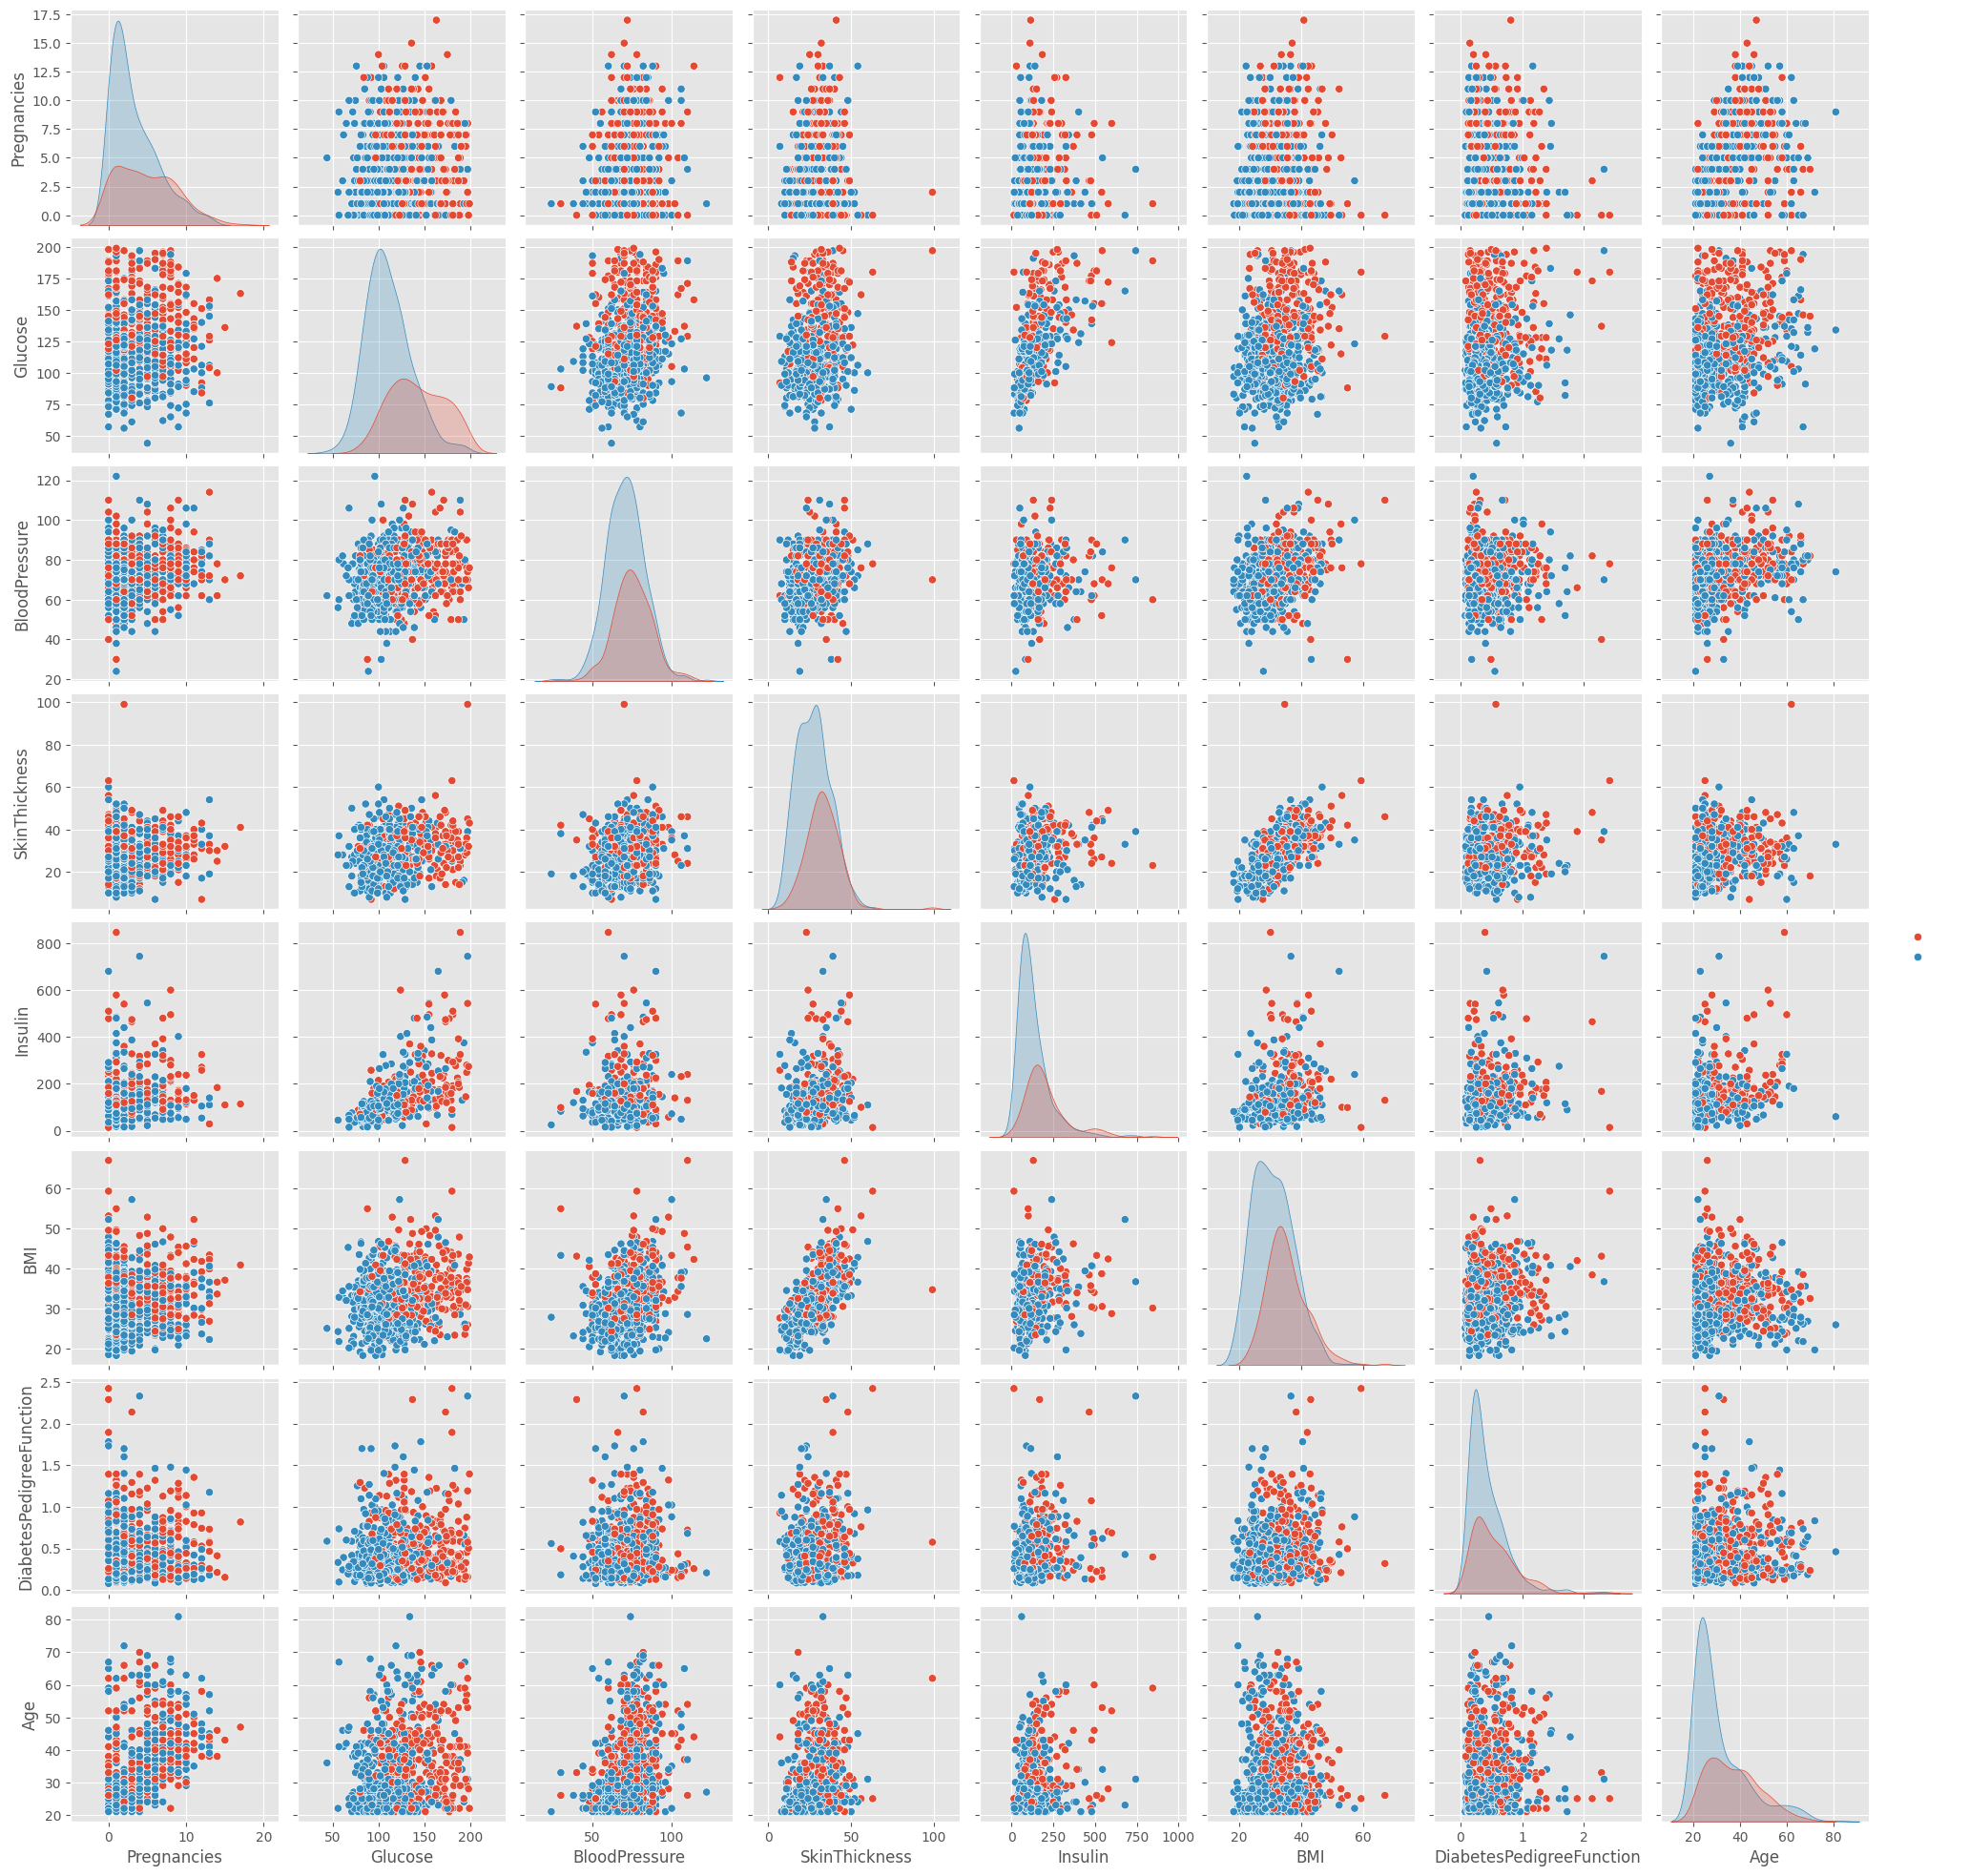

In [13]:
plt.style.use('ggplot')
sns.pairplot(diabetes_data, hue='Outcome')
plt.show()

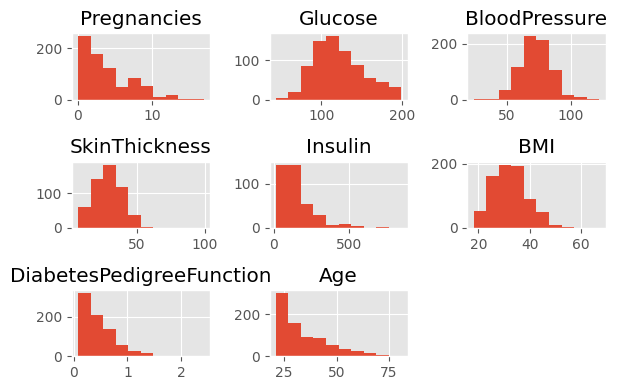

In [25]:
# plot histogram of each column
plt.style.use("ggplot")
diabetes_data.hist(figsize=(6, 4))
plt.tight_layout()
plt.show()

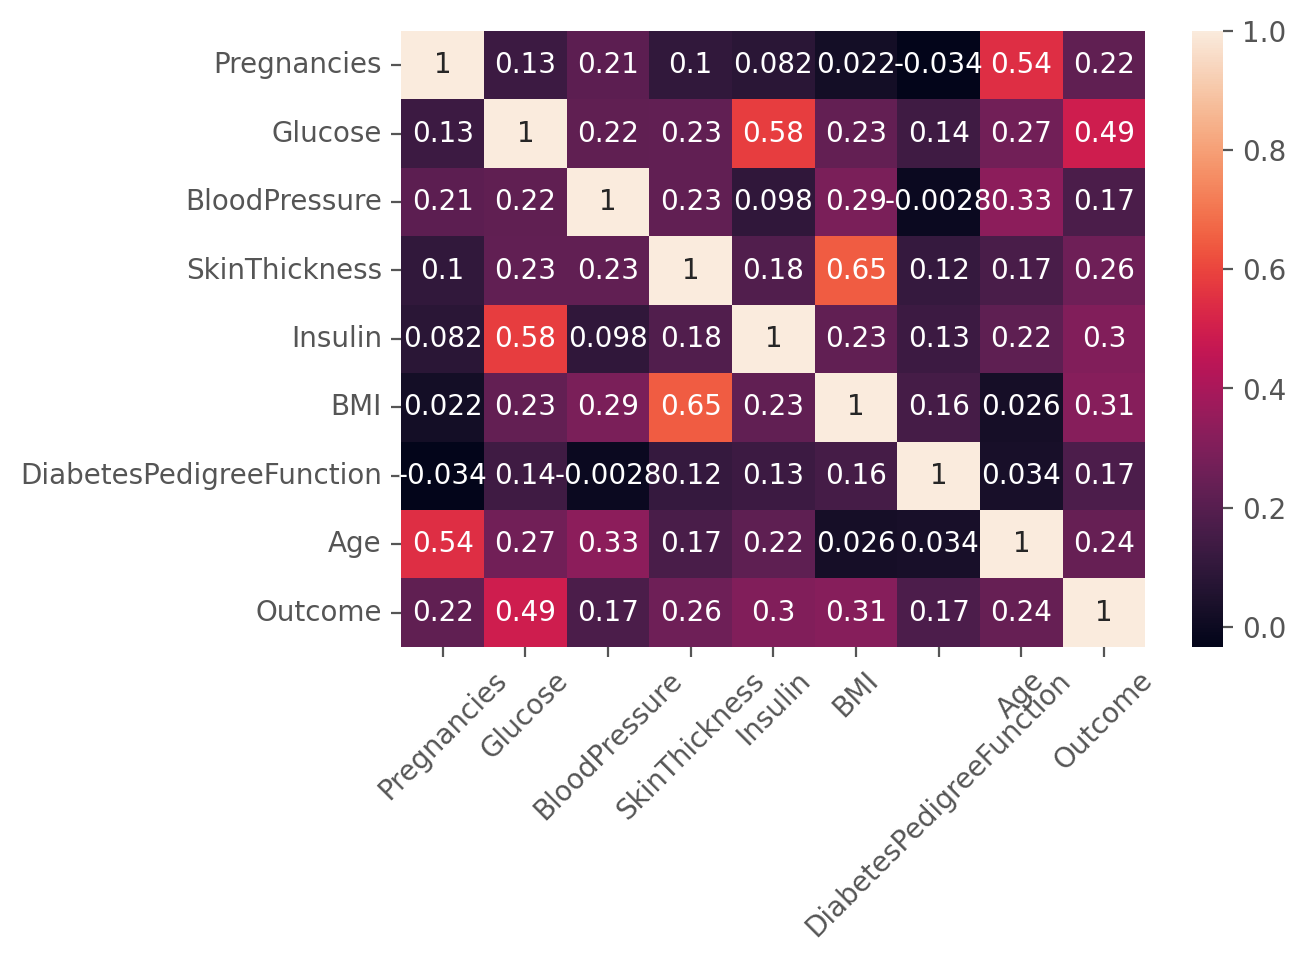

In [18]:
plt.figure(figsize=(6, 4), dpi=200)
sns.heatmap(diabetes_data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

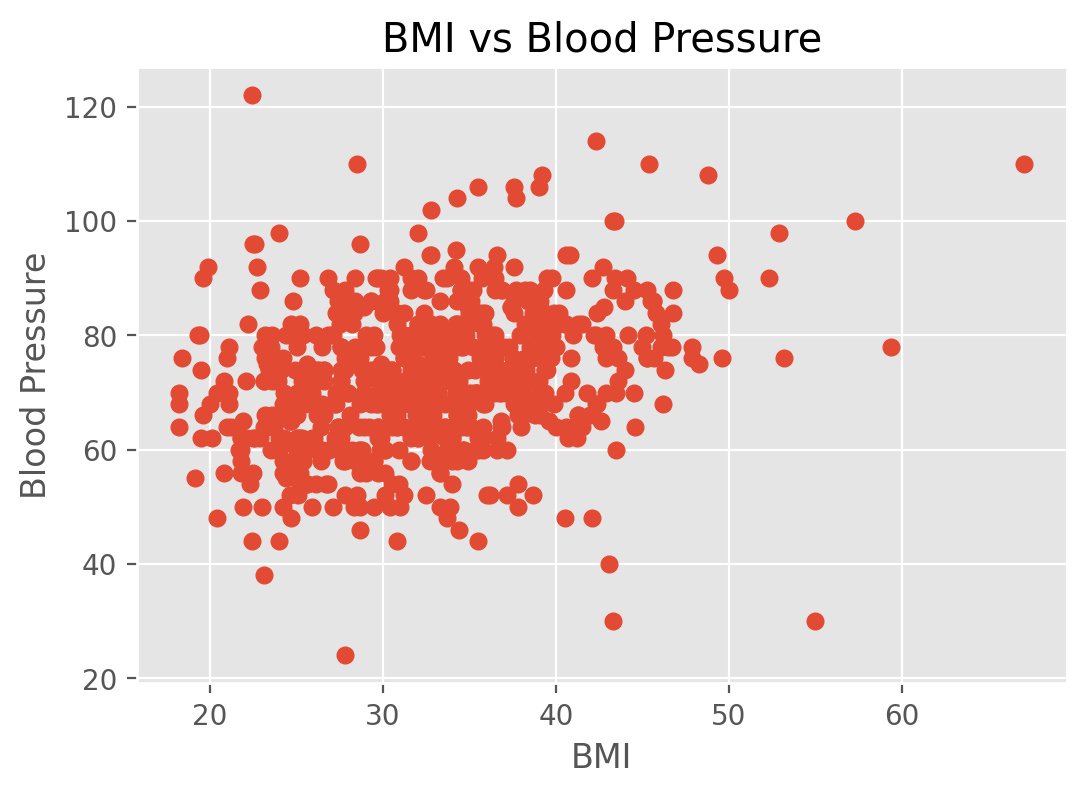

In [26]:
plt.figure(figsize=(6, 4), dpi=200)
plt.scatter(diabetes_data['BMI'], diabetes_data['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('BMI vs Blood Pressure')
plt.show()


<Figure size 1200x800 with 0 Axes>

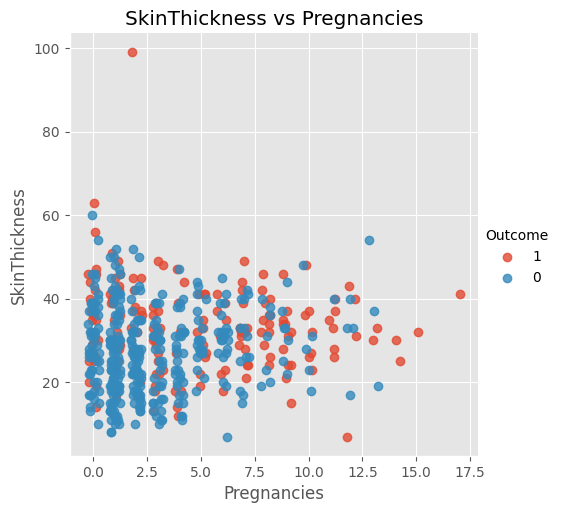

In [27]:
# Your existing code for the scatterplot
plt.figure(figsize=(6, 4), dpi=200)
sns.lmplot(x='Pregnancies', y='SkinThickness', data= diabetes_data, hue='Outcome', x_jitter=0.25, fit_reg=False)
plt.xlabel('Pregnancies')
plt.ylabel('SkinThickness')
plt.title('SkinThickness vs Pregnancies')
plt.show()


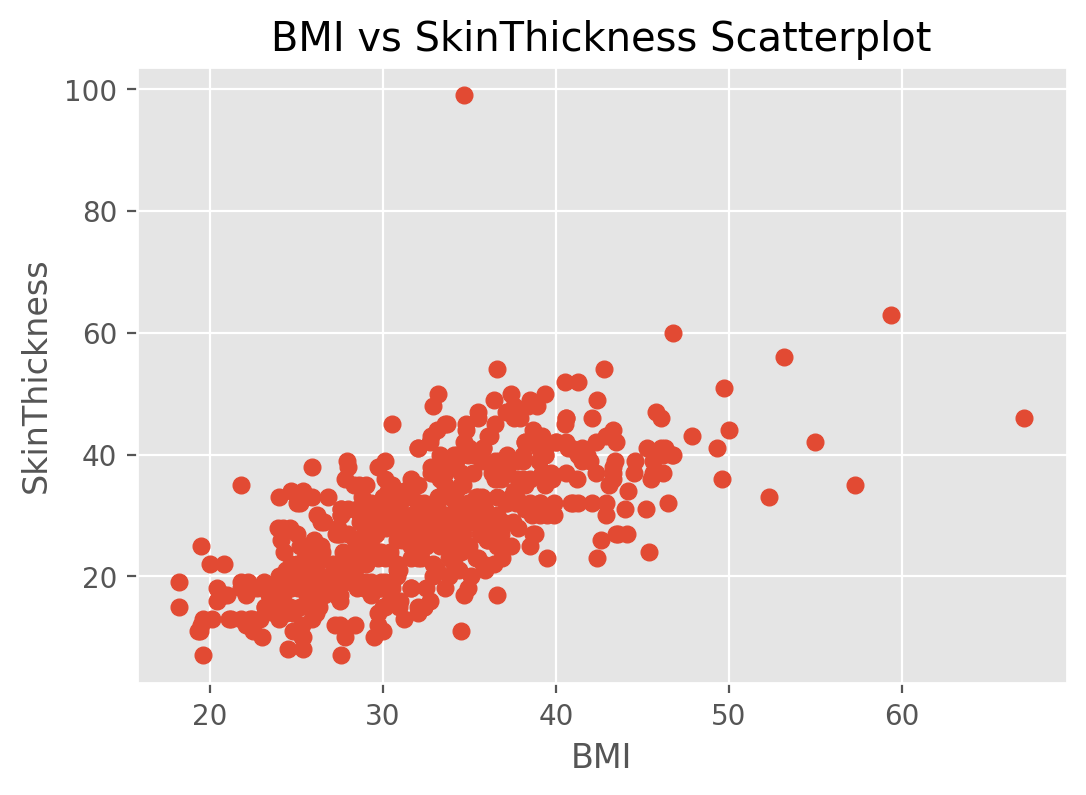

In [21]:
plt.figure(figsize=(6, 4), dpi=200)
plt.scatter(diabetes_data['BMI'], diabetes_data['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI vs SkinThickness Scatterplot')
plt.show()